# Bayes Time Series

We will use the PyMC3 library to implement the Bayesian Time Series

In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA

First, we would randomize the time series data

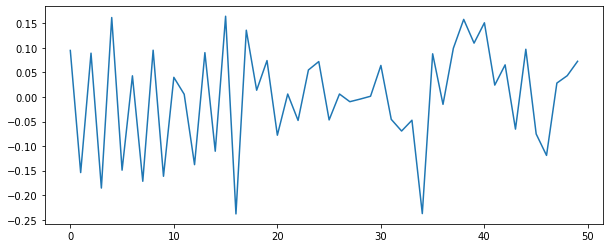

In [2]:
true_phi_1 = -0.2
true_phi_2 = 0.5
true_sigma = 0.1

xvals = [np.random.normal(0, true_sigma), np.random.normal(0, true_sigma)]
for _ in range(50):
    xvals.append(true_phi_1*xvals[-1] + true_phi_2*xvals[-2] + np.random.normal(0, true_sigma))
xvals = np.array(xvals[2:])
plt.figure(figsize=(10,4))
plt.plot(xvals)

# Introduction to ARIMA
The ARIMA stands for <b>Auto-Regressive Integrated Moving Average</b>. Lags of the stationarized series in the forecasting equation are called "autoregressive" terms, lags of the forecast errors are called "moving average" terms, and a time series which needs to be differenced to be made stationary is said to be an "integrated" version of a stationary series. Random-walk and random-trend models, autoregressive models, and exponential smoothing models are all special cases of ARIMA models. <br>

The ARIMA forecasting equation for a stationary time series is a linear (i.e., regression-type) equation in which the predictors consist of lags of the dependent variable and/or lags of the forecast errors.  That is:<br>

<b>Predicted value of Y = a constant and/or a weighted sum of one or more recent values of Y and/or a weighted sum of one or more recent values of the errors.</b>




We call the ARIMA function by <b>ARIMA(p, d, q)</b>. Here:<br>
- <b>p</b> is the number of autoregressive terms
- <b>d</b> is the number of nonseasonal differences needed for stationarity
- <b>q</b> is the number of lagged forecast errors in the prediction equation

When two out of the three terms are zeros, the model may be referred to based on the non-zero parameter, dropping "AR", "I" or "MA" from the acronym describing the model. For example, <b>ARIMA(1,0,0)</b> is <b>AR(1)</b>, <b>ARIMA(0,1,0)</b> is <b>I(1)</b>, and <b>ARIMA(0,0,1)</b> is <b>MA(1)</b>.

<b>ARIMA(1,0,0)</b> = first-order autoregressive model<br>
<b>ARIMA(0,1,0)</b> = random walk<br>
<b>ARIMA(1,1,0)</b> = differenced first-order autoregressive model<br>
<b>ARIMA(0,1,1)</b> without constant = simple exponential smoothing<br>
<b>ARIMA(0,1,1)</b> with constant = simple exponential smoothing with growth<br>
<b>ARIMA(0,2,1)</b> or (0,2,2) without constant = linear exponential smoothing<br>
<b>ARIMA(1,1,2)</b> with constant = damped-trend linear exponential smoothing<br>

# Fit AR Model
Next, we would try to fit the AR Model into our time series (Here we use AR(2))

![Image](https://ichi.pro/assets/images/max/724/1*gjzlB8i1agGNPlz4Zv5ZnA.png)

In [3]:
model = ARIMA(xvals, order=(2,0,0)).fit(maxiter=200)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                     ARMA(2, 0)   Log Likelihood                  51.658
Method:                       css-mle   S.D. of innovations              0.086
Date:                Wed, 16 Jun 2021   AIC                            -95.315
Time:                        19:54:48   BIC                            -87.667
Sample:                             0   HQIC                           -92.403
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.015     -0.047      0.963      -0.030       0.028
ar.L1.y       -0.2419      0.126     -1.927      0.054      -0.488       0.004
ar.L2.y        0.4320      0.128      3.375      0.001       0.181       0.683
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2670           +0.0000j            1.2670            0.5000
AR.2            1.8270           +0.0000j            1.8270            0.0000
-----------------------------------------------------------------------------
"""

We plot the time series and the AR model:

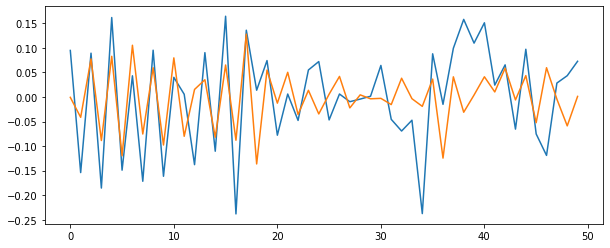

In [4]:
plt.figure(figsize=(10,4))
plt.plot(xvals)
plt.plot(model.fittedvalues)

We make a forecast based on our model:

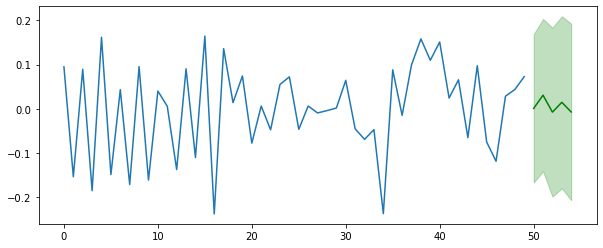

In [5]:
plt.figure(figsize=(10,4))
plt.plot(xvals)
forecast = model.forecast(5)
plt.plot(range(len(xvals), len(xvals) + 5), forecast[0], color='g')
plt.fill_between(range(len(xvals), len(xvals) + 5), forecast[2][:,0], forecast[2][:,1], color='g', alpha=0.25)

# Bayesian Analysis with PyMC3

We initialize the distributions so that we can draw the values from by using Markov Chain Monte Carlo

### Priors:
### $\phi_1 \sim N(0,20)$
### $\phi_2 \sim N(0,20)$
### $\sigma \sim Exp(1)$

### Likelihood:
### $x_t|\phi_1, \phi_2, \sigma, x_{t-1}, x_{t-2} \sim N(\phi_1 x_{t-1} + \phi_2 x_{t-2}, \sigma)$

### Posterior
### $\phi_1, \phi_2, \sigma|x \sim ?$


<ipython-input-6-7d97c7e9fc28>:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, phi]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
<ipython-input-6-7d97c7e9fc28>:13: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
C:\Users\ACER\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-6-7d97c7e9fc28>:14: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


<Figure size 504x504 with 0 Axes>

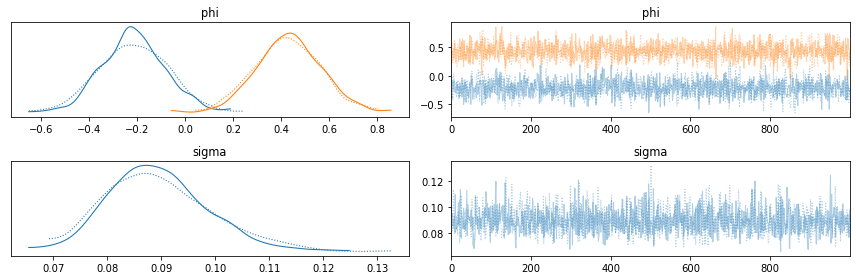

In [6]:
with pm.Model() as bayes_model:
    #priors
    phi = pm.Normal("phi", mu=0, sigma=20, shape=2)
    sigma = pm.Exponential("sigma", lam=1)

    #Likelihood
    likelihood = pm.AR("x", phi, sigma, observed=xvals)

    #posterior
    trace = pm.sample(1000, cores=2)
    
plt.figure(figsize=(7, 7))
pm.traceplot(trace)
plt.tight_layout()

# Parameter Distributions

We generate posterior predictive samples from our model given the result generated by Markov Chain Monte Carlo sampling:

In [10]:
phi1_vals = trace.get_values('phi')[:,0]
phi2_vals = trace.get_values('phi')[:,1]
sigma_vals = trace.get_values('sigma')

Now we plot the posterior distributions:

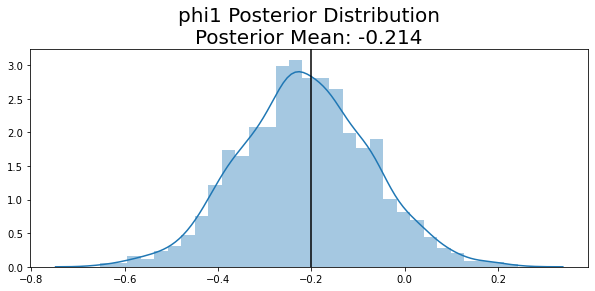

In [11]:
plt.figure(figsize=(10,4))
sns.distplot(phi1_vals)
plt.axvline(true_phi_1, color='k')
plt.title('phi1 Posterior Distribution\nPosterior Mean: %s'%round(phi1_vals.mean(), 3), fontsize=20)
plt.show()

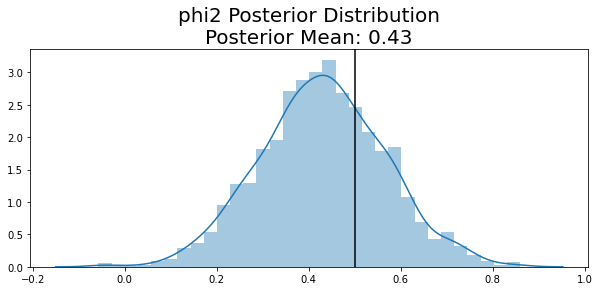

In [12]:
plt.figure(figsize=(10,4))
sns.distplot(phi2_vals)
plt.axvline(true_phi_2, color='k')
plt.title('phi2 Posterior Distribution\nPosterior Mean: %s'%round(phi2_vals.mean(), 3), fontsize=20)
plt.show()

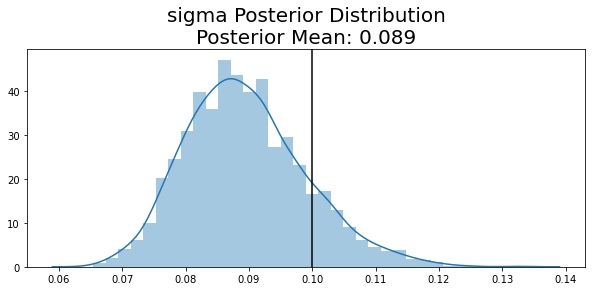

In [13]:
plt.figure(figsize=(10,4))
sns.distplot(sigma_vals)
plt.axvline(true_sigma, color='k')
plt.title('sigma Posterior Distribution\nPosterior Mean: %s'%round(sigma_vals.mean(), 3), fontsize=20)
plt.show()

# Forecast Next Values

We make some forecasts for five periods by using values from our distributions

In [8]:
num_samples = 10000
forecasted_vals = []
num_periods = 5

for _ in range(num_samples):
    curr_vals = list(xvals.copy())
    
    phi1_val = np.random.choice(phi1_vals)
    phi2_val = np.random.choice(phi2_vals)
    sigma_val = np.random.choice(sigma_vals)
    
    for _ in range(num_periods):
        curr_vals.append(curr_vals[-1]*phi1_val + curr_vals[-2]*phi2_val + np.random.normal(0, sigma_val))
    forecasted_vals.append(curr_vals[-num_periods:]) 
forecasted_vals = np.array(forecasted_vals)

We plot the distribution for our predicted values:

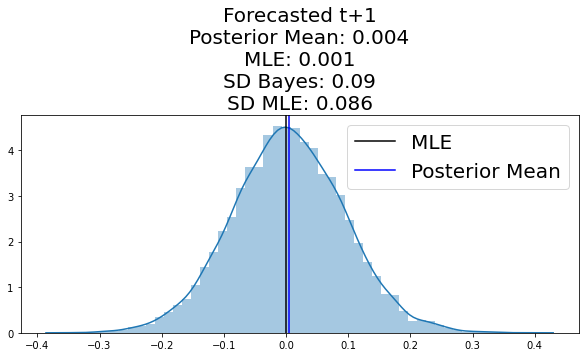

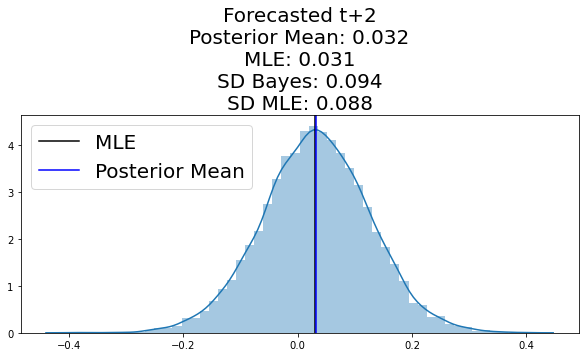

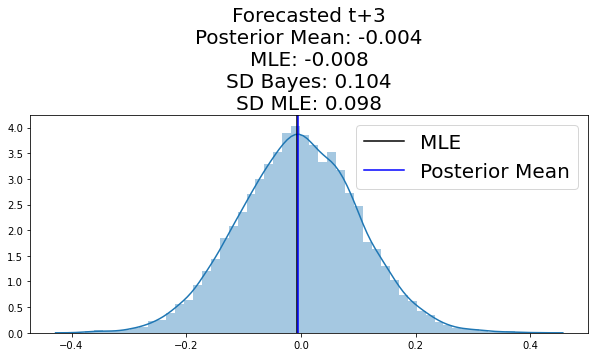

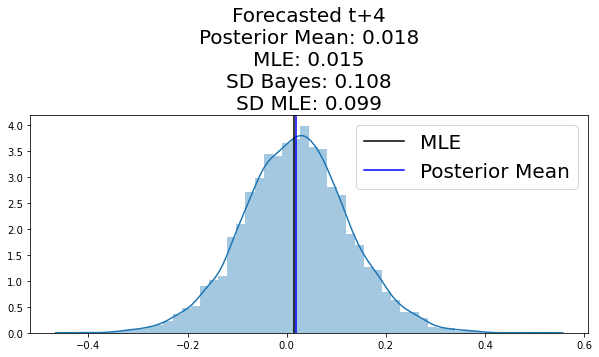

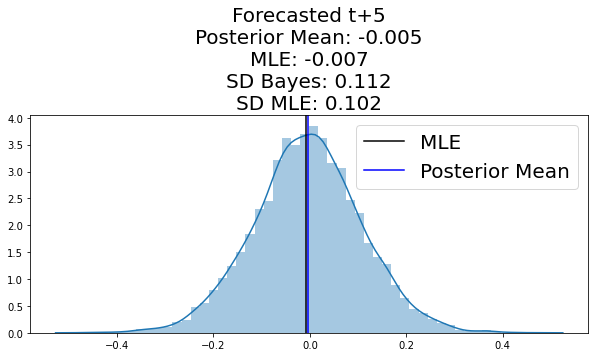

In [9]:
for i in range(num_periods):
    plt.figure(figsize=(10,4))
    vals = forecasted_vals[:, i]
    mu, dev = round(vals.mean(), 3), round(vals.std(), 3)
    sns.distplot(vals)
    p1 = plt.axvline(forecast[0][i], color='k')
    p2 = plt.axvline(vals.mean(), color='b')
    plt.legend((p1,p2), ('MLE', 'Posterior Mean'), fontsize=20)
    plt.title('Forecasted t+%s\nPosterior Mean: %s\nMLE: %s\nSD Bayes: %s\nSD MLE: %s'%((i+1), mu, round(forecast[0][i],3), dev, round(forecast[1][i],3)), fontsize=20)